# **HW1- Box Office Revenue Prediction**

### Submittors: Almog Gueta , Inbal Croitoru 

#### The code for this project exists via this GitHub link: https://github.com/inbalcroitoru/hw1_Box_Office_Revenue_Prediction
 


# 1. Load Data


### 1.1. Import Libraries



In [ ]:
!pip install pycaret

In [1]:
# Import libraries 

# Data Manipulation
import numpy as np 
import pandas as pd
import ast
import itertools

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
from wordcloud import WordCloud

# Machine Learning
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_squared_log_error 
from pycaret.regression import *
import scipy.stats as stats

# Maths
import math

# data structures 
from collections import Counter 

# data files 
# from zipfile import ZipFile
import pickle

# Set the options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline

### 1.2. Define Inputs
 

**Notice**: we predict log_revenue instead of revenue, and then transform to revenue using exp(). This way results in better RMSLE and prevents negative predictions since exp is allways positive.  

In [2]:
# Input file name with path
input_file_name = 'train.tsv'

#test file name with path
test_file_name='test.tsv'

# Target class name
input_target_class = "logrevenue" # "revenue" - we predict log_revenue and then transform to revenue using exp(). This way results in better RMSLE and prevents negative predictions since exp is allways positive.  

# Columns to be removed
input_drop_col = ["backdrop_path","homepage","poster_path","status"]

# Col datatype selection
input_datatype_selection = 'auto'  # use auto if you don't want to provide column names by data type else use 'manual'

# Categorical columns
input_cat_columns = ["genres_ids"]

categorical_features =["original_language","video"]
# Numerical columns
input_num_columns = []

# Encoding technique
input_encoding = 'OneHotEncoder' # choose the encoding technique from 'LabelEncoder', 'OneHotEncoder', 'OrdinalEncoder' and 'FrequencyEncoder'
dummies_cols=["genres_ids"]

# Handle missing value
input_treat_missing_value = 'impute' # choose how to handle missing values from 'drop','impute' and 'ignore'


### 1.3. Load train dataset


In [4]:
# Read data in form of a csv file
df = pd.read_csv(input_file_name, sep='\t')

# First 5 rows of the dataset
df.head()

backdrop_path  \
0  /7IBpOrw0ATwL1AOV97mtsceDpYs.jpg   
1  /lYeE7k0OR3HXyoq7FeswyaxFJvL.jpg   
2  /gVXLIfMR2hLmkn0nACctlMCJBfx.jpg   
3  /rKjE17ncAGNzeImNWbdGTimzjtk.jpg   
4  /zcJxJVhvxNHJJ2J7Q7NhgO9nPUV.jpg   

                               belongs_to_collection     budget  \
0  {'id': 556, 'name': 'Spider-Man Collection', '...  258000000   
1  {'id': 256296, 'name': 'Silent Night, Deadly N...     250000   
2                                                NaN          0   
3  {'id': 8917, 'name': 'Hellraiser Collection', ...    1000000   
4  {'id': 108693, 'name': "National Lampoon's Vac...   15000000   

                                              genres  \
0  [{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...   
1  [{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...   
2                [{'id': 99, 'name': 'Documentary'}]   
3                     [{'id': 27, 'name': 'Horror'}]   
4  [{'id': 35, 'name': 'Comedy'}, {'id': 12, 'nam...   

                                         homepage      id    imdb_id  \
0  https://www.sonypictures.com/movies/spiderman3     559  tt0413300   
1                                             NaN   50719  tt0093974   
2                    https://www.scottymovie.com/  469062  tt2773246   
3                                             NaN    9003  tt0093177   
4                                             NaN   11153  tt0085995   

  original_language                              original_title  \
0                en                                Spider-Man 3   
1                en           Silent Night, Deadly Night Part 2   
2                en  Scotty and the Secret History of Hollywood   
3                en                                  Hellraiser   
4                en                 National Lampoon's Vacation   

                                            overview  popularity  \
0  The seemingly invincible Spider-Man goes up ag...      22.024   
1  After being traumatized by his brother Billy's...       4.756   
2  A deliciously scandalous portrait of unsung Ho...       4.746   
3  An unfaithful wife encounters the zombie of he...      13.828   
4  Clark Griswold is on a quest to take his famil...      15.070   

                        poster_path  \
0  /2N9lhZg6VtVJoGCZDjXVC3a81Ea.jpg   
1  /64ATtm2eMd0yfrTJsHANQ0NmMSn.jpg   
2  /2uXDNXBoIrRBbfpVrvegoLr8OVt.jpg   
3  /4nfAhOTlfZUHNorHJXEib7GYFpp.jpg   
4  /ySI88wO1IFyKGWpSKRTSPilE3t2.jpg   

                                production_companies  \
0  [{'id': 19551, 'logo_path': '/2WpWp9b108hizjHK...   
1  [{'id': 18924, 'logo_path': None, 'name': 'Sil...   
2  [{'id': 88564, 'logo_path': '/pn3p12IC4Tb0K8re...   
3  [{'id': 1950, 'logo_path': None, 'name': 'New ...   
4  [{'id': 174, 'logo_path': '/IuAlhI9eVC9Z8UQWOI...   

                                production_countries release_date    revenue  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   2007-05-01  890871626   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   1987-04-10     154323   
2  [{'iso_3166_1': 'US', 'name': 'United States o...   2018-07-27     176236   
3   [{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]   1987-09-11   14564027   
4  [{'iso_3166_1': 'US', 'name': 'United States o...   1983-07-28   61399552   

   runtime                                   spoken_languages    status  \
0    139.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
1     88.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
2     98.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
3     94.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
4     99.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                             tagline  \
0                                 The battle within.   
1         The nightmare is about to begin ... AGAIN!   
2                                                NaN   
3                        He'll tear your soul apart.   
4  Every summer Ch

### 1.4. Open nested-structured columns 

In [5]:
dict_columns = ['belongs_to_collection','genres','spoken_languages','production_companies',
                'production_countries','Keywords','cast','crew']

def text_to_dict(df):
    for columns in dict_columns:
        df[columns] = df[columns].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
    return df

df = text_to_dict(df)

### 1.5. Columns descriptions 

Some of the disctiptions are from our understanding of the data, and some are from information found online. 

**Data Description id** - Integer unique id of each movie.

**belongs_to_collection** - Contains the TMDB Id, Name, Movie Poster and Backdrop URL of a movie.

**budget** - Budget of a movie in dollars. 0 values mean unknown.

**genres** - Contains all the Genres Name & TMDB Id. 

**homepage** - Contains the official homepage URL of a movie. 

**imdb_id** - IMDB id of a movie (string). 

**original_language** - Two digit code of the original language, in which the movie was made. Like: en = English, fr = french. 

**original_title** - The original title of a movie. Title & Original title may differ, if the original title is not in English. 

**overview** - Brief description of the movie.

**popularity** - Popularity of the movie in float.

**poster_path** - Poster path of a movie. 

**production_companies** - All production company name and TMDB id of a movie.

**production_countries** - Two digit code and full name of the production company. 

**release_date** - Release date of a movie in mm/dd/yy format.

**runtime** - Total runtime of a movie in minutes.

**spoken_languages** - Two digit code and full name of the spoken language.

**status** - Is the movie released or rumored?

**tagline** - Tagline of a movie. 

**title** - English title of a movie. 

**Keywords** - TMDB Id and name of all the keywords.

**cast** - All cast TMDB id, name, character name and gender (0=unspecified, 1=female, 2=male). 

**crew** - Name, TMDB id, profile path of various kind of crew members job like Director, Writer, Art, Sound etc.

**revenue** - Total revenue earned by a movie in dollars.

# 2. Creating new feature columns

### 2.1. Adding log revenue column - better RMSLE when predicting 

In [6]:
df['logrevenue'] = np.log1p(df['revenue'])

### 2.2. Adding datetime features 

In [7]:
def times_transformations(df):
  #change data types- to be categorical
  df['release_date'] =  pd.to_datetime(df['release_date'])

  #add new datetime features - weekday, month, year
  df['release_weekday'] = df['release_date'].apply(lambda t: t.weekday())
  df['release_month'] = df['release_date'].apply(lambda t: t.month)
  df['release_year'] = df['release_date'].apply(lambda t: t.year) 

  return df 

In [8]:
df = times_transformations(df)

### 2.3. Adding boolean features 

In order to add features of top categories of genres, production_companies and original_language, we want to analyze the number of categories and the number of movies in each category. 

In [43]:
def top_categories_analysis(df, col_name):
  list_of_categories = list(df[col_name].apply(lambda x: [i['name'] for i in x] if x!={} else []).values)
  d = dict(Counter([i for j in list_of_categories for i in j]))
  print(f'Num of {col_name} categories in data: {len(d.keys())}')
  temp = df[col_name].apply(lambda x: len(x) if x!= {} else 0).value_counts().to_frame().reset_index()
  temp.columns =['num of categories', 'num of movies']
  print(temp)
  # d_sorted = sorted(d.items(), key=lambda item: item[1], reverse=True)
  # print(d_sorted)
  print("\n\n")

top_categories_analysis(df, 'genres')
top_categories_analysis(df, 'production_companies') 

df['original_language'].value_counts()

Num of genres categories in data: 19
   num of categories  num of movies
0                  2           1719
1                  3           1577
2                  1           1053
3                  4            636
4                  5            190
5                  6             25
6                  0             14
7                  8              1



Num of production_companies categories in data: 5872
    num of categories  num of movies
0                   2           1293
1                   1           1227
2                   3           1009
3                   4            637
4                   5            344
5                   6            236
6                   0            170
7                   7            117
8                   8             67
9                   9             48
10                 11             22
11                 10             16
12                 12              7
13                 13              6
14                 14       

en    4385
fr     148
hi     119
ja      77
es      73
ru      63
ko      48
it      46
zh      40
de      38
cn      38
tr      14
ta      14
ml      13
pt      11
da      10
sv       9
ar       8
te       6
fa       6
nl       5
pl       5
no       5
fi       4
cs       3
th       3
he       3
hu       3
id       2
bn       2
el       2
sk       1
mi       1
ab       1
nb       1
xx       1
af       1
sw       1
ka       1
tl       1
vi       1
sl       1
ro       1
Name: original_language, dtype: int64

We can see that majority of the movies have 1-3 geners and 1-3 production companies. 
In addition, about 80% of the movies are in English. 

From the results we chose to take the top 15 genres and the top 30 production_companies and original_languages

In [9]:
def create_more_features(df):
  # has poster_path 
  df['has_poster_path'] = 1 
  df.loc[pd.isnull(df['poster_path']) ,"has_poster_path"] = 0 

  # has collection 
  df['has_collection'] = df['belongs_to_collection'].apply(lambda x: 1 if x!={} else 0)

  # num of genres
  df['num_of_genres'] = df['genres'].apply(lambda x: len(x) if x!={} else 0)

  # one hot encoding of genres 
  list_of_genres = list(df['genres'].apply(lambda x: [i['name'] for i in x] if x!={} else []).values)
  top_genres =[m[0] for m in Counter([i for j in list_of_genres for i in j]).most_common(15)] 
  df['all_genres'] = df['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in x ])) if x!= {} else '')
  for g in top_genres:
      df['genre_' + g] = df['all_genres'].apply(lambda x: 1 if g in x else 0)
  df = df.drop(columns=['all_genres'])

  # has home_page 
  df['has_homepage'] = 1
  df.loc[pd.isnull(df['homepage']) ,"has_homepage"] = 0

  # num of production_companies 
  df['num_prod_companies'] = df['production_companies'].apply(lambda x: len(x) if x!= {} else 0)

  # one hot encoding of production_companies 
  List_of_companies = list(df['production_companies'].apply(lambda x: [i['name'] for i in x] if x!= {} else []))
  top_prod_companies = [m[0] for m in Counter(i for j in List_of_companies for i in j).most_common(30)]
  df['all_prod_companies'] = df['production_companies'].apply(lambda x: ' '.join(sorted([i['name'] for i in x ])) if x!= {} else '')
  for t in top_prod_companies:
      df['prod_companies_' + t] = df['all_prod_companies'].apply(lambda x: 1 if t in x else 0)
  df = df.drop(columns=['all_prod_companies'])

  # one hot encoding of original_language  
  List_of_languages = df['original_language'].unique()
  top_languages = list(df['original_language'].value_counts().head(30).index)
  for t in top_languages:
    df['original_languages_' + t] = df['original_language'].apply(lambda x: 1 if t==x else 0)

  # num of production countries 
  df['num_prod_countries'] = df['production_countries'].apply(lambda x: len(x) if x!= {} else 0)

  # num of spoken languages 
  df['num_of_langs'] = df['spoken_languages'].apply(lambda x: len(x) if x!= {} else 0)

  # num of cast members 
  df['num_of_cast']= df['cast'].apply(lambda x: len(x) if x!={} else 0)

  # num of crew members 
  df['num_of_crew'] = df['crew'].apply(lambda x: len(x) if x!= {} else 0)

  return df 

In [10]:
df = create_more_features(df)

# 3. Exploratory Data Analaysis

### 3.1. Descriptive Statistics

- Mean, median, mode 
- Min, max
- Count 
- Types
- Number of samples and features 


In [12]:
# Dimension of the data
df.shape

(5215, 115)

In [13]:
# Summary of the dataset
df.describe() 

budget             id   popularity       revenue      runtime  \
count  5.215000e+03    5215.000000  5215.000000  5.215000e+03  5211.000000   
mean   2.147967e+07   98768.673442    10.016559  6.538743e+07   108.027442   
std    3.631509e+07  143992.708567     7.075799  1.432381e+08    22.740973   
min    0.000000e+00       5.000000     1.519000  1.000000e+00     0.000000   
25%    0.000000e+00   10136.000000     6.264000  2.360718e+06    94.000000   
50%    6.500000e+06   24662.000000     9.009000  1.515620e+07   104.000000   
75%    2.600000e+07  121704.000000    11.801000  6.214247e+07   118.000000   
max    3.800000e+08  679106.000000   151.237000  2.046240e+09   465.000000   

       vote_average    vote_count   logrevenue  release_weekday  \
count   5215.000000   5215.000000  5215.000000      5215.000000   
mean       6.399099   1062.859636    15.897057         3.263663   
std        0.943931   2097.172266     3.076433         1.303889   
min        0.000000      0.000000     0.693147         0.000000   
25%        5.900000     74.000000    14.674476         2.000000   
50%        6.400000    290.000000    16.533920         4.000000   
75%        7.100000   1028.000000    17.944940         4.000000   
max       10.000000  24834.000000    21.439270         6.000000   

       release_month  release_year  has_poster_path  has_collection  \
count    5215.000000   5215.000000      5215.000000     5215.000000   
mean        6.915820   2000.802876         0.967977        0.204219   
std         3.370261     15.990835         0.176078        0.403168   
min         1.000000   1915.000000         0.000000        0.000000   
25%         4.000000   1993.000000         1.000000        0.000000   
50%         7.000000   2005.000000         1.000000        0.000000   
75%        10.000000   2013.000000         1.000000        0.000000   
max        12.000000   2019.000000         1.000000        1.000000   

       num_of_genres  genre_Drama  genre_Comedy  genre_Thriller  genre_Action  \
count    5215.000000  5215.000000   5215.000000     5215.000000   5215.000000   
mean        2.468648     0.482646      0.360882        0.242186      0.231448   
std         1.093151     0.499747      0.480302        0.428447      0.421798   
min         0.000000     0.000000      0.000000        0.000000      0.000000   
25%         2.000000     0.000000      0.000000        0.000000      0.000000   
50%         2.000000     0.000000      0.000000        0.000000      0.000000   
75%         3.000000     1.000000      1.000000        0.000000      0.000000   
max         8.000000     1.000000      1.000000        1.000000      1.000000   

       genre_Romance  genre_Adventure  genre_Crime  genre_Horror  \
count    5215.000000      5215.000000  5215.000000   5215.000000   
mean        0.193289         0.144199     0.144008      0.105657   
std         0.394915         0.351326     0.351131      0.307427   
min         0.000000         0.000000     0.000000      0.000000   
25%         0.000000         0.000000     0.000000      0.000000   
50%         0.000000         0.000000     0.000000      0.000000   
75%         0.000000         0.000000     0.000000      0.000000   
max         1.000000         1.000000     1.000000      1.000000   

       genre_Science Fiction  genre_Family  genre_Fantasy  genre_Mystery  \
count            5215.000000   5215.000000    5215.000000    5215.000000   
mean                0.098754      0.091850       0.085139       0.081687   
std                 0.298360      0.288842       0.279115       0.273914   
min                 0.000000      0.000000       0.000000       0.000000   
25%                 0.000000      0.000000       0.000000       0.000000   
50%                 0.000000      0.000000       0.000000       0.000000   
75%                 0.000000      0.000000       0.000000       0.000000   
max                 1.000000      1.000000       1.000000       1.000000   

       genre_Animation  genre_History 

Notice that "budget" column has a minimum of 0- which does not make sense. 

We figured out that the value 0 marks that the budget is unknown. Therefore, we will fix rows with 0 value using informative means. Further details in section Feature Engineering 

In addition, we can see that there are NaN and 0 values for "runtime". We will impute this feature in the Feature Engineering section. 

### 3.2. Explore missing and uncertain values

Get the info about missing & uncertain values in the dataframe

In [42]:
# Missing values for every column
df_columns = ['column', 'num samples']
temp = pd.DataFrame(columns=df_columns)

for col in df.columns:
  if df[col].isna().sum() > 0:
    temp = temp.append(pd.DataFrame([[col, df[col].isna().sum()]],columns=df_columns), ignore_index=True)

temp

column num samples
0  backdrop_path         577
1       homepage        3449
2        imdb_id          15
3       overview           6
4    poster_path         167
5        runtime           4
6        tagline        1025

We can see that there are missing values in the data. We will keep analyzing the data and impute necessary columns (such as runtime) and delete un-necessary columns. 


We want to make sure that there is a logic in the vote_average and vote_count: 
- no movies with average > 0 & count = 0

We also want to know how many samples does not have any voters: 
- no movies with average = 0 and count = 0 

In [45]:
vote_df = df[['vote_average', 'vote_count']]
# print(vote_df[(vote_df.vote_average ==0) & (vote_df.vote_count!=0)], '\n')
print(f'Number of samples with average > 0 and count = 0 is: {len(vote_df[(vote_df.vote_count ==0) & (vote_df.vote_average!=0)])}', '\n')
print(f'Number of samples without any voters is: {len(vote_df[(vote_df.vote_count ==0) & (vote_df.vote_average==0)])}', '\n')

Number of samples with average > 0 and count = 0 is: 0 

Number of samples without any voters is: 8 



We can see that there is a logic in both columns. In section 3.5. we will check the correlation of these columns with 'revenue' and decide whether to keep both columns or only one of them. 

In addition, we can see that there are few samples without any voters. Since this fact can be an indicator by itself, we will not "correct" these values, and we will keep them as it is. 

### 3.3. Distribution of target class


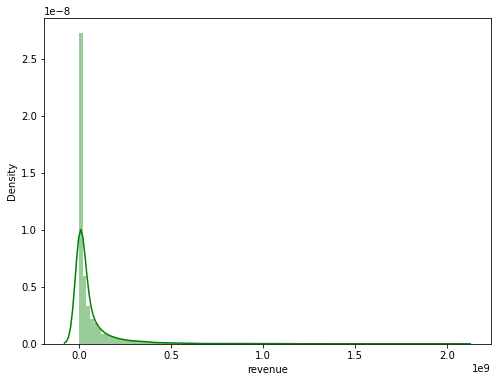

In [21]:
plt.figure(figsize=(8, 6))
_ = sns.distplot(df['revenue'], color='g', bins=100, hist_kws={'alpha': 0.4})

We can see that the target column has a large pick that make the graph skew and uninformative. In order to understand the distribution, we will transform the "revenew" using log function. 

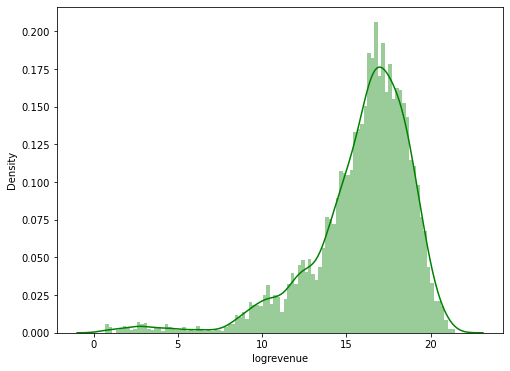

In [22]:
plt.figure(figsize=(8, 6))
_ = sns.distplot(df['logrevenue'], color='g', bins=100, hist_kws={'alpha': 0.4})

We can see a better distribution of the data now. 

### 3.4. Analysis and distribution of every feature

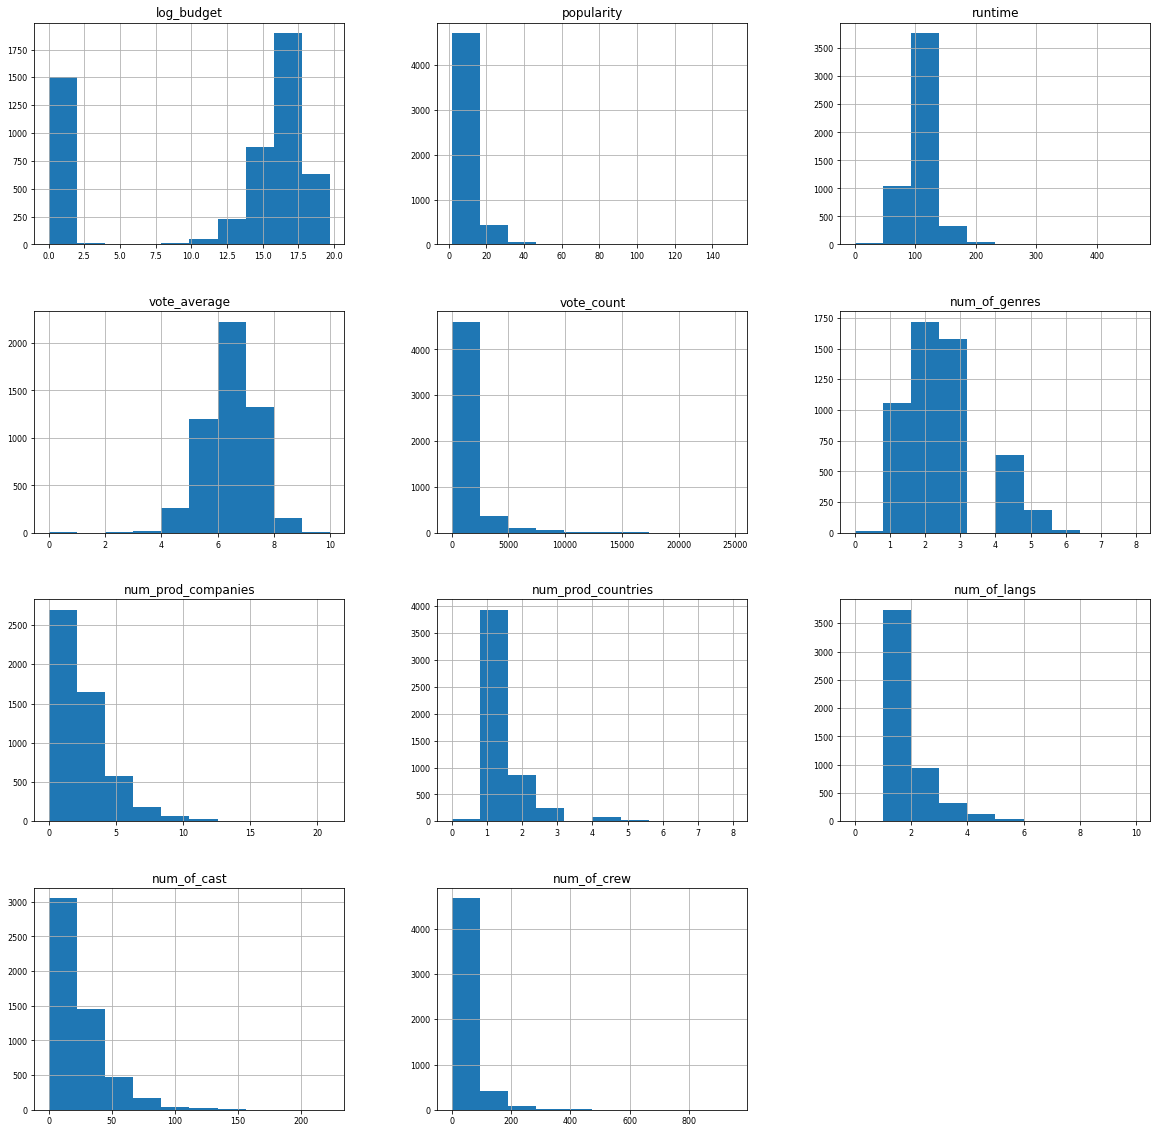

In [23]:
cols_to_plot = ['budget', 'popularity', 'runtime', 'vote_average', 'vote_count']
cols_to_plot = cols_to_plot + [col_name for col_name in df.columns if col_name.startswith('num_')]
temp = df[cols_to_plot]
temp['budget'] = np.log1p(temp['budget'])
temp = temp.rename(columns={'budget':'log_budget'})
_ = temp.hist(figsize=(20, 20), xlabelsize=8, ylabelsize=8)

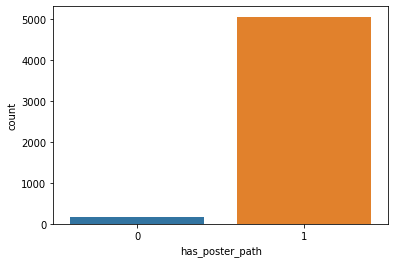

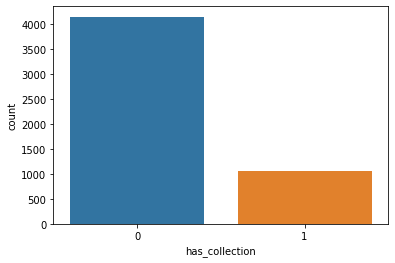

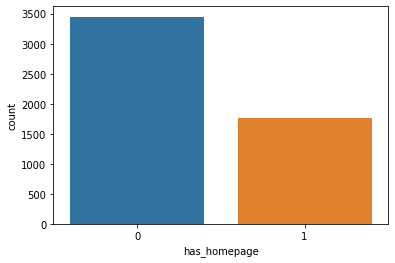

In [24]:
binary_cols = [col_name for col_name in df.columns if col_name.startswith('has_')]
for col in binary_cols:
  plt.figure()
  _ = sns.countplot(x=col,data=df)

We can see that the data is not balanced according to these features. 

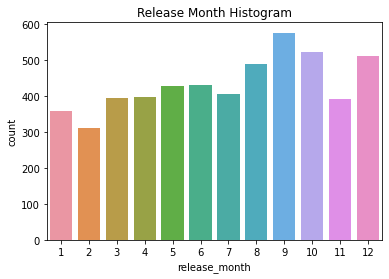

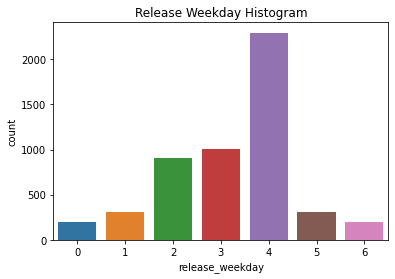

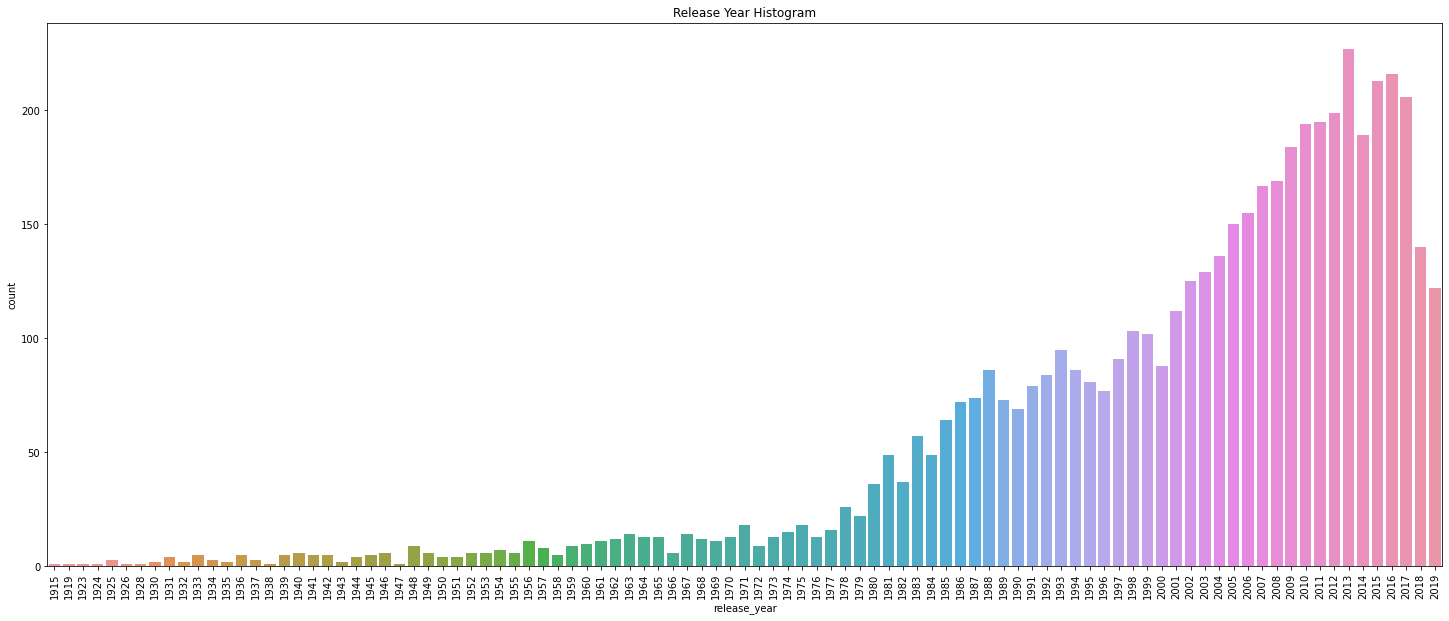

In [57]:
_ = sns.countplot(x='release_month',data=df).set_title('Release Month Histogram')
plt.figure()
_ = sns.countplot(x='release_weekday',data=df).set_title('Release Weekday Histogram')
plt.figure(figsize=(25, 10))
_ = sns.countplot(x='release_year',data=df).set_title('Release Year Histogram')
_ = plt.xticks(rotation=90)

We can see that the popular release months are over the summer, the popular release weekday is Wednesday (which make sense since it is right before the weekend where many people go to the movies). 

We can also see that most movies in the data were released in the last two decades.  

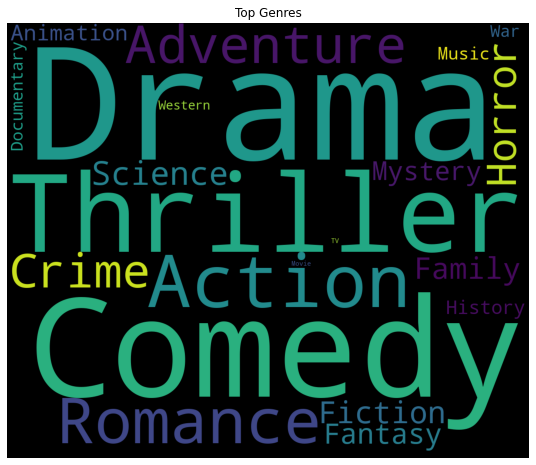

In [26]:
list_of_genres = list(df['genres'].apply(lambda x: [i['name'] for i in x] if x!={} else []).values)
plt.figure(figsize=(12,8))
text = ' '.join(i for j in list_of_genres for i in j)
wordcloud = WordCloud(max_font_size = None, width = 1200, height = 1000,
                      collocations =False).generate(text)
plt.imshow(wordcloud)
plt.title('Top Genres')
plt.axis('off')
plt.show()

We can see that Drama, Comedy and Thriller are popular genres. 

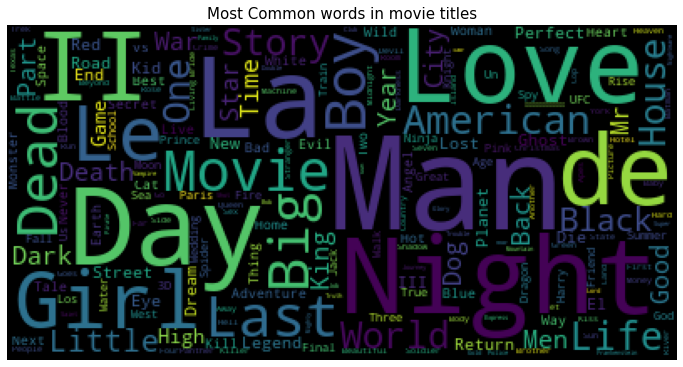

In [27]:
plt.figure(figsize=(12,10))
text4 = ' '.join(df['original_title'].sort_values(ascending=False))
wordcloud = WordCloud(collocations=False).generate(text4)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Common words in movie titles', fontsize=15)
plt.show()

We can notice than many popular titles' words are not in English, for example "la" and "de", these can imply that many movies are not American.  

### 3.5. Correlation between revenue and the numeric features




In [28]:
df_num = df[['budget', 'popularity', 'vote_count', 'num_of_crew', 'num_of_cast', 'runtime', 'num_of_genres', 'num_prod_companies', 'vote_average', 'num_of_langs', 'release_month', 'num_prod_countries', 
             'release_year', 'release_weekday']+[input_target_class]+['revenue']]

In [58]:
df_num_corr = df_num.corr()['revenue'] 
sorted_features_list = df_num_corr.sort_values(ascending=False)
print("There are {} values correlated with Revenue:\n{}".format(len(sorted_features_list), sorted_features_list))

There are 16 values correlated with Revenue:
revenue               1.000000
vote_count            0.769808
budget                0.753590
popularity            0.567924
num_of_crew           0.487750
logrevenue            0.484683
num_of_cast           0.391190
num_of_genres         0.188328
runtime               0.183223
vote_average          0.159344
release_year          0.133527
num_prod_companies    0.118847
num_of_langs          0.070465
release_month         0.036822
num_prod_countries    0.021848
release_weekday      -0.128638
Name: revenue, dtype: float64


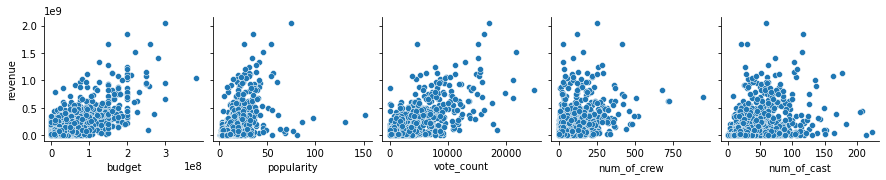

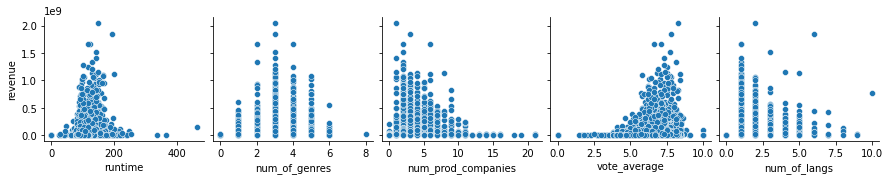

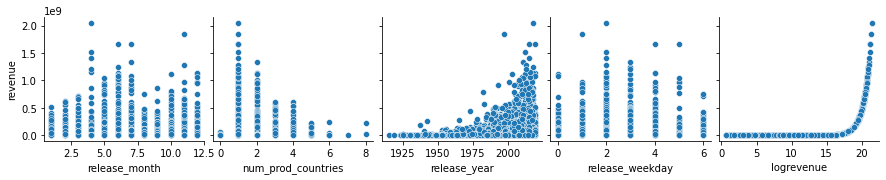

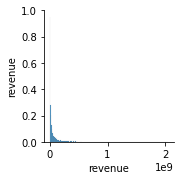

In [30]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['revenue'])

We can see that different features have different correlations with "revenue". 

We will keep the features and use Feature Seclection method for selecting the informative features for predictions. 

Specifically, we see that there is large correlation between vote_count and revenue, and small correlation between vote_average and revenue. We will keep both columns for auto feature selection by the models.

## 3.6. Relative distribution between log_revenue and categorial features 

We tried to grpah the distribution according to revenue, but since the range of revenue is very large, the graph is less informative. Therefore, we ploted the graph according to log_revenue. 

In [11]:
px.box(df.loc[df['original_language'].isin(df['original_language'].value_counts().head(6).index)], x='original_language', y='logrevenue', title='Log Revenue Distribution for top Languages')

In [12]:
px.box(df.loc[df['video'].isin(df['video'].value_counts().head(6).index)], x='video', y='logrevenue', title='Log Revenue Distribution for Video')

We can see that the revenue differs for different languages- the largest revenue is for an English spoken movie. 

We can also see that the revenue has larger variance when a sample of movie does not have a video. We need to remember that most of the data does not have a video, therefore it make sense that the variance and the top quarter are larger. 

# 4. Feature Engineering 



### 4.1. Checking the necessity of columns 

In [ ]:
status_values=df.status.value_counts()
video_values=df.video.value_counts() 

print("status_values: \n",status_values,"\n\nvideo_values: \n",video_values)

status_values: 
 Released    5215
Name: status, dtype: int64 

video_values: 
 False    5197
True       18
Name: video, dtype: int64


We can see that all "status" values are the same -> this feature does not hold any information. 
"video" values are mostly the same, but since we do have 2 different values, we think this feature might be informative, and we will keep it. 

### 4.2. Deal with missing & uncertain data


In [ ]:
# auxilary function to impute uncertain data using annual mean 
def impute_using_annual_mean(df, col_to_impute):
  all_mean = df[col_to_impute].mean()
  
  df.loc[pd.isnull(df[col_to_impute]) ,col_to_impute] = 0
  
  run = df[(df[col_to_impute].notnull()) & (df[col_to_impute] != 0)]
  year_mean_df = run.groupby(['release_year'])[col_to_impute].agg('mean').to_frame()
  year_mean_df = year_mean_df.reset_index().rename(columns={col_to_impute: 'mean_val'})
  
  df = pd.merge(df, year_mean_df, on="release_year", how='left')
  df = df.fillna(value={"mean_val":all_mean})
  df.loc[df[col_to_impute] == 0, [col_to_impute]] = df['mean_val']

  df = df.drop(columns=['mean_val'])

  return df 

We saw that there are movies with NaN or 0 value for "runtime". 
  We will impute the uncertain values using the annual average of runtime of other movies released at the same year. 

In [ ]:
print(f'Num of rows with uncertain value in runtime column is: {len(df[(df.runtime==0) | (df.runtime.isna())])}')

Num of rows with uncertain value in runtime column is: 16


In [ ]:
df = impute_using_annual_mean(df, 'runtime')

In [ ]:
# sanity check 
print(f'Num of rows with uncertain value in runtime column is: {len(df[(df.runtime==0) | (df.runtime.isna())])}')

Num of rows with uncertain value in runtime column is: 0


Look at the distribution of "budget" 

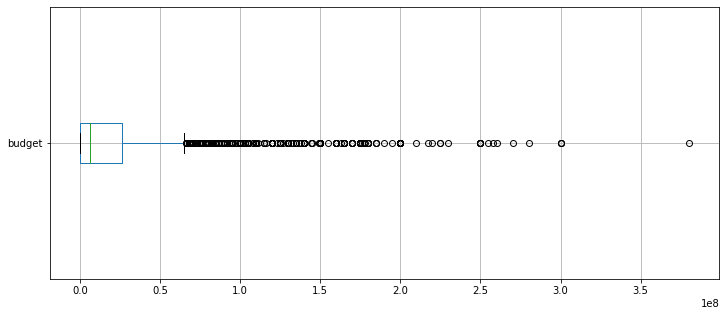

In [ ]:
df.boxplot(column=['budget'], vert=False, figsize=(12, 5))

We can see that there are 0 values that need to be imputed, and we can also see that there is a single very large value. We will check the correctness of the largest budget value, and then impute the 0 values. 

In [ ]:
temp_df = df[df.budget == max(df.budget)]
movie_name = temp_df.original_title.values[0] 
print(f'The movie with the largest budget is: {movie_name}\n')
print(f'The budget of this movie according to our data is: {temp_df.budget.values[0]} dollars')

The movie with the largest budget is: Pirates of the Caribbean: On Stranger Tides

The budget of this movie according to our data is: 380000000 dollars


According to a search in google, the budget of this movie was 410M dollar. 
Therefore, the value in our data make sense and we will not chang it. 

We only need to fix rows with budget = 0. 

In [ ]:
num_of_zeros = len(df[df.budget == 0])
print(f'number of rows with zero budget is: {num_of_zeros}')

number of rows with zero budget is: 1487


In [ ]:
df = impute_using_annual_mean(df, 'budget')

In [ ]:
# sanity check 
print(f'Num of rows with uncertain value in budget column is: {len(df[(df.budget==0) | (df.budget.isna())])}')

Num of rows with uncertain value in budget column is: 0


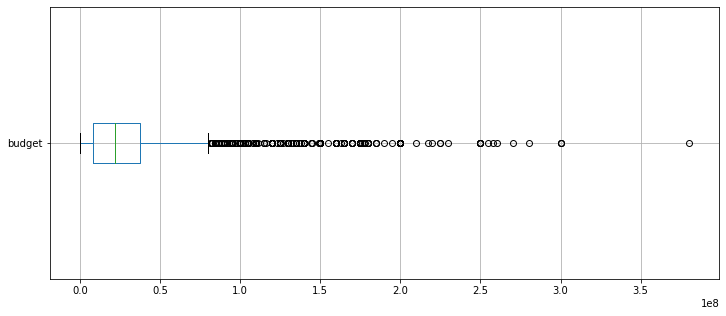

In [ ]:
# budget distribution after imputation 
df.boxplot(column=['budget'], vert=False, figsize=(12, 5))

The distribution looks better now. 

### 4.3. Add log budget feature after imputing budget 

We figured out that 'log budget' feature might increase the predictive power of the model. The reason might be is the large range of values, and the large values themselves. 



In [ ]:
df['logbudget'] = np.log1p(df['budget'])

### 4.4. create Unknown values for columns that count numbers
Look which columns have 0 values - these are the columns with Unknown values 

In [ ]:
cols_with_num = [col for col in df.columns if col.startswith('num_')]
temp = df[cols_with_num] 
temp.min() 

num_of_genres         0
num_prod_companies    0
num_prod_countries    0
num_of_langs          0
num_of_cast           0
num_of_crew           0
dtype: int64

We can see that all columns have missing data in these columns. 
We will impute 0 values using "-1" in order to mark that the value is unknown, and also keep it numeric. 

In [ ]:
for col in cols_with_num:
  df.loc[df[col]==0 ,col] = -1 

#sanity check   
df[cols_with_num].min()

num_of_genres        -1
num_prod_companies   -1
num_prod_countries   -1
num_of_langs         -1
num_of_cast          -1
num_of_crew          -1
dtype: int64


### 4.5. Feature Encoding

Convert linguistic labels to numeric

In [ ]:
# df['original_language']=(pd.Categorical(df.original_language).codes).astype('int')          -> we encoded this columns differently in section 2.2. 

df['video']=(pd.Categorical(df.video).codes).astype('int')

### 4.6. Keep only wanted feature columns 

In [ ]:
cols_to_drop = ['backdrop_path', 'belongs_to_collection', 'genres', 'original_language', 'homepage', 'imdb_id', 'original_title', 'overview', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'spoken_languages', 'status', 'tagline', 'title', 'Keywords', 'cast', 'crew']
df = df.drop(columns=cols_to_drop)

Sanity check- make sure there are no null values in any column. 

In [ ]:
print(f'Sum of null values in all columns is: {sum(list(df.isna().sum()))}')

Sum of null values in all columns is: 0


Look at the columns of the data in order to preper the columns for the models. 

In [ ]:
df_cols = list(df.columns)
df_cols.sort()
df_cols

In [ ]:
# We will consider all columns as numeric since we already transformed columns to be "dummies" ehen necessary 
categorical_cols  =[]


original_lang_cols = [col for col in df.columns if col.startswith('original_languages_')]
genres_cols = [col for col in df.columns if col.startswith('genre_')]
prod_companies_cols = [col for col in df.columns if col.startswith('prod_companies_')]
has_cols = [col for col in df.columns if col.startswith('has_')]

numeric_cols = ['budget', 
                'logbudget', 
                  'num_of_cast',
                  'num_of_crew',
                  'num_of_genres',
                  'num_of_langs',
                  'num_prod_companies',
                  'num_prod_countries',
                  'popularity',
                  'release_month',
                  'release_weekday',
                  'release_year',
                  'runtime',
                    'vote_average',
                  'vote_count'] + original_lang_cols + genres_cols + prod_companies_cols + has_cols + ['video']

wanted_cols = categorical_cols + numeric_cols + [input_target_class] 

# 5. Test data- load & transform 

### 5.1. Load test data

In [ ]:
test = pd.read_csv(test_file_name, sep='\t')

### 5.2. Tranform test data 

Process same transformation as on train data 

We Added fillna() operation just for safety. 

In [ ]:
# convert nested columns 
dict_columns = ['belongs_to_collection','genres','spoken_languages','production_companies',
                'production_countries','Keywords','cast','crew']
test = text_to_dict(test) 

# create log revenue column 
test['logrevenue'] = np.log1p(test['revenue']) 

# create time transformations and times new features 
test = times_transformations(test)

# add boolean features 
test = create_more_features(test)

# impute uncertain data 
test = impute_using_annual_mean(test, 'runtime')
test = impute_using_annual_mean(test, 'budget')

# create log budget column 
test['logbudget'] = np.log1p(test['budget']) 

# impute cols with "num_" with -1 values 
cols_with_num = [col for col in test.columns if col.startswith('num_')]
for col in cols_with_num:
  test.loc[test[col]==0 ,col] = -1 

# complete missing data - if any 
test = test.fillna(0)

# feature encoding 
# test['original_language']=(pd.Categorical(test.original_language).codes).astype('int')
test['video']=(pd.Categorical(test.video).codes).astype('int')

# drop not used columns 
cols_to_drop = ['backdrop_path', 'belongs_to_collection', 'genres', 'original_language', 'homepage', 'imdb_id', 'original_title', 'overview', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'spoken_languages', 'status', 'tagline', 'title', 'Keywords', 'cast', 'crew']
test = test.drop(columns=cols_to_drop) 

# 6. Model train & predict  


### 6.1. Auto create & train regression models 



We decided to use auto Feature Selection with a threshold of 0.55 (after trying different values and check the selected features and the RMSLE)

We decided to use minmax normalization in order to scale all features to the same range 

setup() function holds the transformed data and the models. We will call its attributes in the next few cells. 

In [ ]:
reg = setup(data = df[wanted_cols], 
             target = input_target_class,
             train_size=0.8,
             normalize = True,
             normalize_method='minmax',
             feature_selection=True, 
             categorical_features = categorical_cols, 
             numeric_features = numeric_cols, 
            feature_selection_threshold = 0.55, 
             silent = True) 

Description             Value
0                               session_id              2282
1                                   Target        logrevenue
2                            Original Data        (5215, 95)
3                           Missing Values             False
4                         Numeric Features                94
5                     Categorical Features                 0
6                         Ordinal Features             False
7                High Cardinality Features             False
8                  High Cardinality Method              None
9                    Transformed Train Set        (4172, 70)
10                    Transformed Test Set        (1043, 70)
11                      Shuffle Train-Test              True
12                     Stratify Train-Test             False
13                          Fold Generator             KFold
14                             Fold Number                10
15                                CPU Jobs                -1
16                                 Use GPU             False
17                          Log Experiment             False
18                         Experiment Name  reg-default-name
19                                     USI              7b50
20                         Imputation Type            simple
21          Iterative Imputation Iteration              None
22                         Numeric Imputer              mean
23      Iterative Imputation Numeric Model              None
24                     Categorical Imputer          constant
25  Iterative Imputation Categorical Model              None
26           Unknown Categoricals Handling    least_frequent
27                               Normalize              True
28                        Normalize Method            minmax
29                          Transformation             False
30                   Transformation Method              None
31                                     PCA             False
32                              PCA Method              None
33                          PCA Components              None
34                     Ignore Low Variance             False
35                     Combine Rare Levels             False
36                    Rare Level Threshold              None
37                         Numeric Binning             False
38                         Remove Outliers             False
39                      Outliers Threshold              None
40                Remove Multicollinearity             False
41             Multicollinearity Threshold              None
42                              Clustering             False
43                    Clustering Iteration              None
44                     Polynomial Features             False
45                       Polynomial Degree              None
46                    Trignometry Features             False
47                    Polynomial Threshold              None
48                          Group Features             False
49                       Feature Selection              True
50                Feature Selection Method           classic
51            Features Selection Threshold              0.55
52                     Feature Interaction             False
53                           Feature Ratio             False
54                   Interaction Threshold              None
55                        Transform Target             False
56                 Transform Target Method           box-cox

Save transformed data and selected features, and look at the not selected features. 

In [ ]:
x_train_data = get_config('X_train')
y_train_data = get_config('y_train')

x_val_data = get_config('X_test')
y_val_data = get_config('y_test')

selected_cols = list(get_config('X').columns) 
print(f' number of optional features: {len(wanted_cols)}')
print(f'number of selected features by PyCaret: {len(selected_cols)}')

print('\nfeatures that were not selected by PyCaeret setup:')
for c in wanted_cols:
  if c not in selected_cols:
    print(c)

 number of optional features: 95
number of selected features by PyCaret: 70

features that were not selected by PyCaeret setup:
original_languages_cn
original_languages_ta
original_languages_tr
original_languages_ml
original_languages_pt
original_languages_da
original_languages_sv
original_languages_ar
original_languages_fa
original_languages_pl
original_languages_nl
original_languages_no
original_languages_fi
original_languages_th
original_languages_hu
original_languages_cs
original_languages_bn
original_languages_id
prod_companies_Canal+
prod_companies_Miramax
prod_companies_TriStar Pictures
prod_companies_StudioCanal
prod_companies_Focus Features
prod_companies_Film4 Productions
logrevenue


We can see that all columns that have nםt been selected are either languages which are probably less common in the dataset, or production companies that are probably less common in the dataset. 
Of course logrevenue, which is the target column, is not one of the explanatory features. 

Get the 5 models with the minimum RMSE. This function runs CV with 10 folds and presents the average measurments over the 10 trials. This results in more stable performance matrixes that can suggest better about the fittness of the model to our task. 

Notice: we did not use RMSLE for sorting since we predict log_revenue and we figured out that for this target column it is better to sort by RMSE instead. 

In [ ]:
top5 = compare_models(sort='RMSE', n_select = 5)  # list of trained model objects

Model     MAE      MSE    RMSE      R2  \
lightgbm  Light Gradient Boosting Machine  1.2341   3.8990  1.9663  0.5749   
et                  Extra Trees Regressor  1.2679   3.9408  1.9796  0.5691   
gbr           Gradient Boosting Regressor  1.2957   4.0300  1.9994  0.5601   
rf                Random Forest Regressor  1.2937   4.0860  2.0145  0.5535   
ridge                    Ridge Regression  1.5598   5.1841  2.2717  0.4332   
br                         Bayesian Ridge  1.5599   5.1872  2.2724  0.4329   
lr                      Linear Regression  1.5630   5.1931  2.2734  0.4322   
huber                     Huber Regressor  1.4846   5.3704  2.3117  0.4137   
omp           Orthogonal Matching Pursuit  1.7193   6.0269  2.4478  0.3425   
lar                Least Angle Regression  1.7370   6.6302  2.5465  0.2724   
knn                 K Neighbors Regressor  1.9603   7.5706  2.7468  0.1721   
dt                Decision Tree Regressor  1.8222   8.4726  2.9047  0.0690   
ada                    AdaBoost Regressor  2.4128   8.6488  2.9301  0.0400   
lasso                    Lasso Regression  2.2072   9.1805  3.0254 -0.0020   
en                            Elastic Net  2.2072   9.1805  3.0254 -0.0020   
llar         Lasso Least Angle Regression  2.2072   9.1805  3.0254 -0.0020   
par          Passive Aggressive Regressor  2.6667  11.3472  3.2641 -0.2257   

           RMSLE    MAPE  TT (Sec)  
lightgbm  0.1852  0.1336     0.213  
et        0.1857  0.1355     2.948  
gbr       0.1881  0.1393     0.921  
rf        0.1865  0.1358     3.693  
ridge     0.2048  0.1647     0.027  
br        0.2049  0.1648     0.044  
lr        0.2040  0.1640     0.318  
huber     0.2102  0.1666     0.291  
omp       0.2126  0.1771     0.029  
lar       0.2267  0.1735     0.041  
knn       0.2336  0.1995     0.216  
dt        0.2738  0.1733     0.086  
ada       0.2332  0.1996     0.364  
lasso     0.2497  0.2255     0.027  
en        0.2497  0.2255     0.028  
llar      0.2497  0.2255     0.028  
par       0.2537  0.2183     0.040

Look at the top 5 models and their parameters 

In [ ]:
top5  

[LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2282, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=2282, verbose=0, warm_start=False),
 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.

In [ ]:
# look at the resulted data 
x_train_data

num_of_cast  ...  prod_companies_Metro-Goldwyn-Mayer
1869     0.209821  ...                                 0.0
746      0.022321  ...                                 0.0
2667     0.129464  ...                                 0.0
4948     0.107143  ...                                 0.0
663      0.044643  ...                                 0.0
...           ...  ...                                 ...
1650     0.209821  ...                                 0.0
505      0.053571  ...                                 0.0
3449     0.281250  ...                                 0.0
3865     0.156250  ...                                 0.0
3968     0.299107  ...                                 0.0

[4172 rows x 70 columns]

In [ ]:
# top 5 models according to RMSLE 
model_1 = create_model(top5[0]) 
model_2 = create_model(top5[1])
model_3 = create_model(top5[2])
model_4 = create_model(top5[3])
model_5 = create_model(top5[4])

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     1.6113  5.4600  2.3367  0.4674  0.2043  0.1563
1     1.5120  4.4567  2.1111  0.4631  0.1755  0.1387
2     1.6072  5.3577  2.3147  0.5053  0.2241  0.1893
3     1.4961  4.7767  2.1856  0.3774  0.1876  0.1441
4     1.5464  5.3008  2.3024  0.3859  0.2219  0.1762
5     1.3854  4.4224  2.1029  0.4613  0.1793  0.1277
6     1.7751  6.6599  2.5807  0.3248  0.2213  0.1754
7     1.5812  5.5525  2.3564  0.4471  0.2309  0.2029
8     1.6158  5.6749  2.3822  0.3998  0.2312  0.2081
9     1.4671  4.1798  2.0444  0.5003  0.1717  0.1284
Mean  1.5598  5.1841  2.2717  0.4332  0.2048  0.1647
SD    0.1002  0.7042  0.1534  0.0556  0.0228  0.0284

In [ ]:
all_models = [model_1, model_2, model_3, model_4, model_5]
models_names = ["LGBMRegressor", "ExtraTreesRegressor", "GradientBoostingRegressor", "RandomForestRegressor", "Ridge"]

Predicting with the created models 

In [ ]:
for model, name in zip(all_models, models_names): 
  pred = model.predict(get_config('X_test'))
  pred = np.exp(pred)
  rmsle = math.sqrt(mean_squared_log_error(np.exp(get_config('y_test')), pred)) 
  print(f'RMSLE of model {name} on train is: {rmsle}')

RMSLE of model LGBMRegressor on train is: 2.1964418795770526
RMSLE of model ExtraTreesRegressor on train is: 2.243177006969952
RMSLE of model GradientBoostingRegressor on train is: 2.239542522168991
RMSLE of model RandomForestRegressor on train is: 2.1960683905094447
RMSLE of model Ridge on train is: 2.4782977357867657


### 6.2. Hyperparameter tuning 

Search space is based on the chosen paramerets' values in the current model. 

After multiple tuning attampts, we decided to only tune ExtraTrees and RandomForest models since the rest of the models are already returned well-tuned from create_models() and we did not succeed to improve them more. 

In [ ]:
def hyperparameters_tuning(model, model_name, space, x_train, y_train, x_test, y_test): 
  tuned_model = RandomizedSearchCV(estimator=model, param_distributions=space, n_iter = 20,
                                scoring='neg_mean_squared_log_error', verbose=2, random_state=42,
                                n_jobs=-1, return_train_score=True)

  tuned_model.fit(x_train, y_train) 

  print(tuned_model.best_params_)
  
  best_model = tuned_model.best_estimator_

  pred = best_model.predict(x_test)
  exp_pred = np.exp(pred)
  exp_y_test = np.exp(y_test)
  rmsle = math.sqrt(mean_squared_log_error(exp_y_test, exp_pred)) 
  print(f'RMSLE of tuned  {model_name} model on val is: {rmsle}')

  return best_model 

In [ ]:
# tuning et 
et_space = {
        'n_estimators': range(50,200,25),
        'min_samples_leaf': range(1,20,5),
        'min_samples_split': range(2,20,5),
    }

tuned_et = hyperparameters_tuning(model_2, 'extra trees', et_space, x_train_data, y_train_data, x_val_data, y_val_data)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.4min finished


{'n_estimators': 150, 'min_samples_split': 17, 'min_samples_leaf': 1}
RMSLE of tuned  extra trees model on val is: 2.2140765889900496


The hyperparameter tuning decreased RMSLE of ExtreTreesRegressor from 2.243 to 2.214 

In [ ]:
# tuning rf 
n_estimators = [int(x) for x in np.linspace(start = 50 , stop = 300, num = 5)] # returns 10 numbers 
max_features = [10,20,40,60,80,100,120, 'auto']
max_depth = [int(x) for x in np.linspace(5, 100, num = 20)] 
# min_samples_leaf = [x for x in np.linspace(0.0001, 0.1, num=10)]
bootstrap = [True, False]
rf_space = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,  
              #  'min_samples_leaf': min_samples_leaf, 
               'bootstrap': bootstrap}

tuned_rf = hyperparameters_tuning(model_4, 'random forest', rf_space, x_train_data, y_train_data, x_val_data, y_val_data)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.8min finished


{'n_estimators': 300, 'max_features': 20, 'max_depth': 100, 'bootstrap': False}
RMSLE of tuned  random forest model on val is: 2.1823024519681002


The hyperparameter tuning decreased RMSLE of RandomForestRegressor from 2.19 to 2.18 

In [ ]:
#  # tuning gb
#  gb_space = {
#      'max_depth':range(2,20,5), 
#      'min_samples_split':range(2,100,10), 
#      'alpha': np.linspace(0.00001,1,num=10), 
#      'learning_rate': np.linspace(0.01, 0.5, num=10) 
#  }

# tuned_gb = hyperparameters_tuning(model_4, 'gb ', gb_space, x_train_data, y_train_data, x_val_data, y_val_data)

In [ ]:
# # tuning lgbm
# lgbm_space = {
#      'max_depth':range(-2,20,10),
#      'n_estimators':range(50, 200, 10),  
#      'learning_rate': np.linspace(0.01, 0.5, num=10)
#  }

# tuned_lgbm = hyperparameters_tuning(model_1, 'lgbm ', lgbm_space, x_train_data, y_train_data, x_val_data, y_val_data)

In [ ]:
# tuning br
#  br_space = {
#      'max_depth':range(-2,20,10),
#      'n_estimators':range(50, 200, 10),  
#      'learning_rate': range(0.01, 0.5, 10)
#  }

# BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
#                compute_score=False, copy_X=True, fit_intercept=True,
#                lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
#                normalize=False, tol=0.001, verbose=False)]

# tuned_gb = hyperparameters_tuning(model_1, 'br ', br_space, get_config('X_train'), get_config('y_train'), get_config('X_test'), get_config('y_test'))

### 6.3. plot feature importance 

In [ ]:
# plot selected features 
def plot_feature_importance(model, name):
  feature_imp = [col for col in zip(get_config('X').columns, model.feature_importances_)]
  feature_imp.sort(key=lambda x:x[1], reverse=True) 
  imp = pd.DataFrame(feature_imp[0:20], columns=['feature', 'importance'])
  plt.figure(figsize=(14, 12))
  sns.barplot(y='feature', x='importance', data=imp)
  plt.title(f'{name} 20 Most Important Features', fontsize=16)
  plt.ylabel("Feature", fontsize=15)
  plt.xlabel("Importance Param",fontsize=15)
  plt.show()

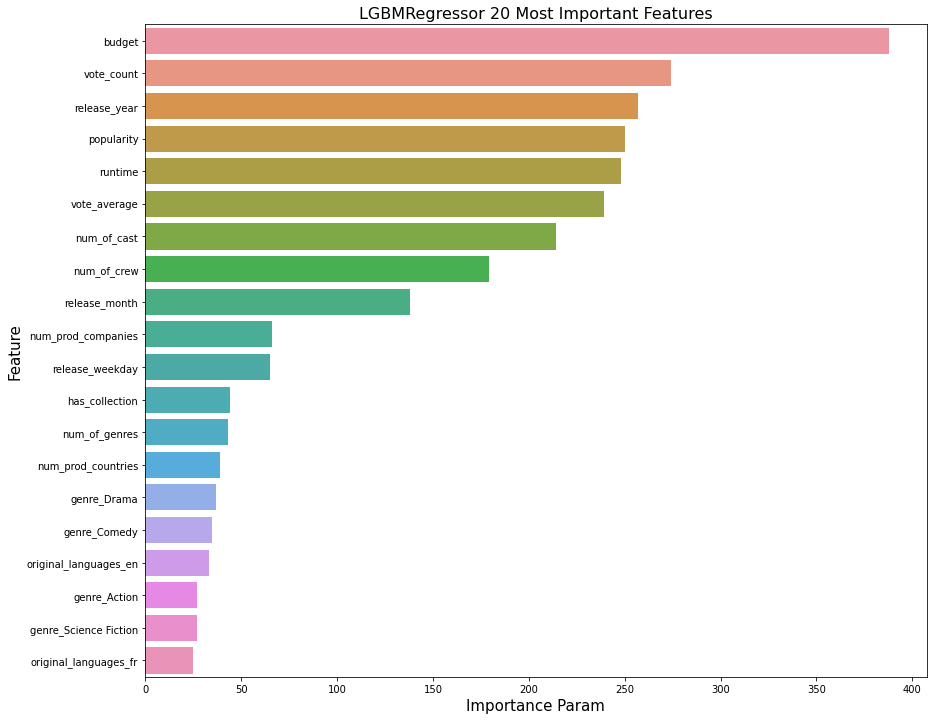

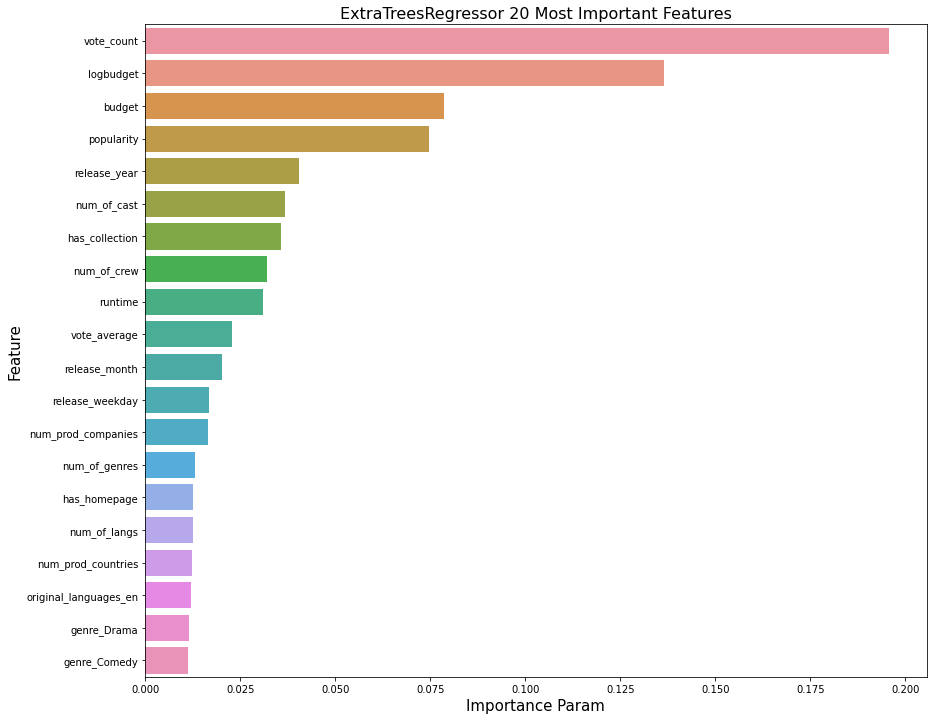

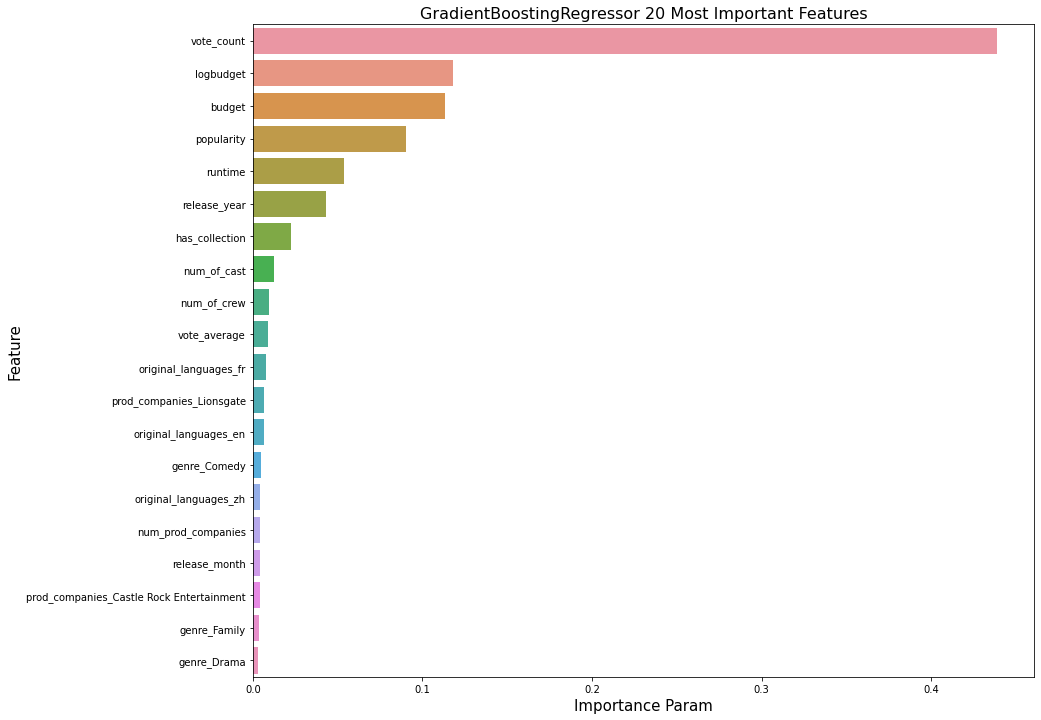

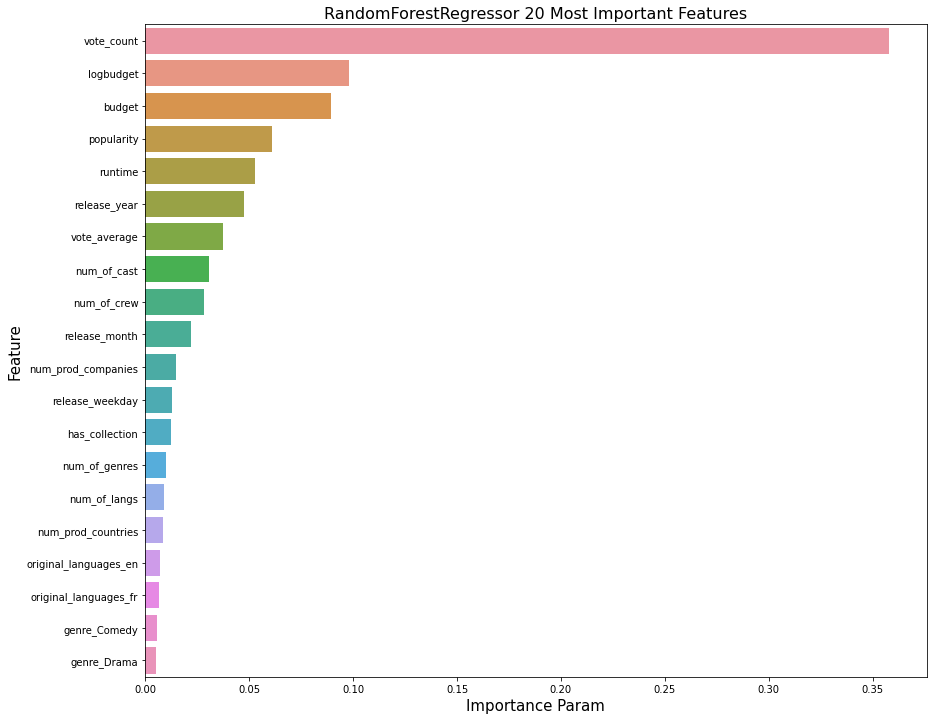

In [ ]:
for curr_model, name in zip([model_1, model_2, model_3, model_4], ["LGBMRegressor", "ExtraTreesRegressor", "GradientBoostingRegressor", "RandomForestRegressor"]):
  plot_feature_importance(curr_model, name)

We can see that there are few feature that are top rated in all models, such as "budget" (or "log-budget"), "vote_count", "popularity", "release_year" and "runtime". 

Additionaly, there are features that are not in the top 20 in all models, for example "video".  

An interesting point is that although we saw in section 3.5 that the correlation between "runtime" and "revenue" was low in comparison to other features (0.1), it is one of the top 6 important features for all chosen regression models. This result surprised us and a is bit odd. A possible reason can be that maybe Pearson Correlation does not indicate of this feature. 

### 6.4. Predict on Test data 

First, we will call setup() on the test data in order to get the same transformations as in train data. We will not aloud Feature Seclection again. We want to use the same features as in train data. 

We will only use the resulted data from the setup(). 

Notice: since train and test data might have different categories- for example different set of original_language values, we will add all columns from train that are not in test, with the value of 0 (remember we transformed these columns as binary) 

In [ ]:
cnt = 0
for col in df.columns:
  if col not in test.columns:
    test[col] = 0.0
    cnt += 1 
print(f'num of added columns to test data: {cnt}')

num of added columns to test data: 11


In [ ]:
test_setup = setup(data = test[selected_cols+[input_target_class]], 
             target = input_target_class,
             train_size=0.8,
             normalize = True,
             normalize_method='minmax',
             feature_selection=False, 
             categorical_features = [], 
             numeric_features = selected_cols, 
             silent = True) 

Description             Value
0                               session_id              1645
1                                   Target        logrevenue
2                            Original Data        (1738, 71)
3                           Missing Values             False
4                         Numeric Features                70
5                     Categorical Features                 0
6                         Ordinal Features             False
7                High Cardinality Features             False
8                  High Cardinality Method              None
9                    Transformed Train Set        (1390, 70)
10                    Transformed Test Set         (348, 70)
11                      Shuffle Train-Test              True
12                     Stratify Train-Test             False
13                          Fold Generator             KFold
14                             Fold Number                10
15                                CPU Jobs                -1
16                                 Use GPU             False
17                          Log Experiment             False
18                         Experiment Name  reg-default-name
19                                     USI              1d15
20                         Imputation Type            simple
21          Iterative Imputation Iteration              None
22                         Numeric Imputer              mean
23      Iterative Imputation Numeric Model              None
24                     Categorical Imputer          constant
25  Iterative Imputation Categorical Model              None
26           Unknown Categoricals Handling    least_frequent
27                               Normalize              True
28                        Normalize Method            minmax
29                          Transformation             False
30                   Transformation Method              None
31                                     PCA             False
32                              PCA Method              None
33                          PCA Components              None
34                     Ignore Low Variance             False
35                     Combine Rare Levels             False
36                    Rare Level Threshold              None
37                         Numeric Binning             False
38                         Remove Outliers             False
39                      Outliers Threshold              None
40                Remove Multicollinearity             False
41             Multicollinearity Threshold              None
42                              Clustering             False
43                    Clustering Iteration              None
44                     Polynomial Features             False
45                       Polynomial Degree              None
46                    Trignometry Features             False
47                    Polynomial Threshold              None
48                          Group Features             False
49                       Feature Selection             False
50                Feature Selection Method           classic
51            Features Selection Threshold              None
52                     Feature Interaction             False
53                           Feature Ratio             False
54                   Interaction Threshold              None
55                        Transform Target             False
56                 Transform Target Method           box-cox

In [ ]:
x_test_data = get_config('X')
y_test_data = get_config('y')

In [ ]:
# sanity check 
print(len(x_train_data.columns), len(x_test_data.columns))

70 70


Now we can predict on test data using all chosen models. 
We will show:
1. The resulted RMSLE
2. Density graph as a function of the revenue, where the density is of difference between the true and predicted values 
3. Scatter plot of predicted values as a function of true values. 

In [ ]:
def predict_on_test_and_plot(model, model_name, data):
  predictions = predict_model(model, data = data) 
  rmsle_test = math.sqrt(mean_squared_log_error(np.exp(predictions[input_target_class]), np.exp(predictions['Label']))) 

  print(f'RMSLE of tuned {"\033[1m" + model_name + "\033[0m"} model on train is: {rmsle_test}')

  # create plot 
  y_test = predictions[input_target_class]
  pred = predictions['Label']

  # sns.distplot((y_test-pred),bins=50)
  # plt.show()

  fig, ax = plt.subplots()
  ax.scatter(y_test, pred)
  ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=1)
  ax.set_xlabel('Measured')
  ax.set_ylabel('Predicted')
  plt.show()

RMSLE of tuned LGBMRegressor model on train is: 2.017871984486942


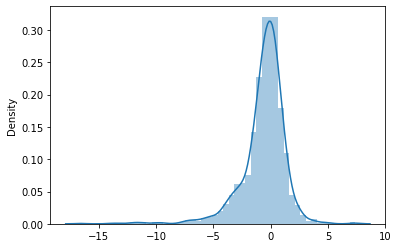

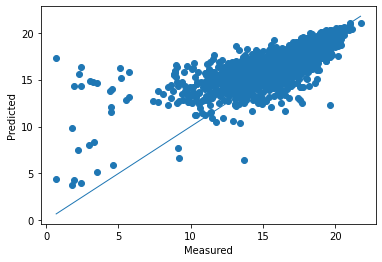

RMSLE of tuned ExtraTreesRegressor model on train is: 1.9473579028242836


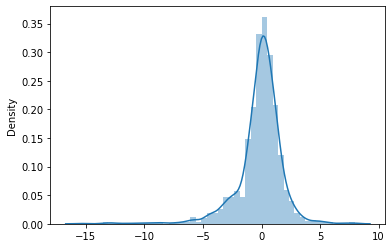

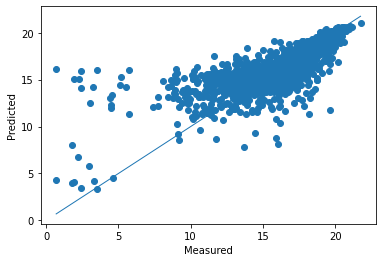

RMSLE of tuned GradientBoostingRegressor model on train is: 2.0469768156344506


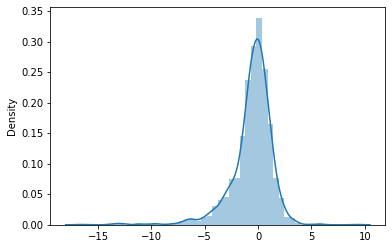

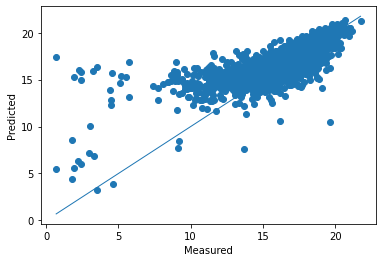

RMSLE of tuned RandomForestRegressor model on train is: 2.0194052544132353


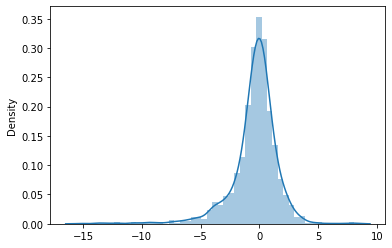

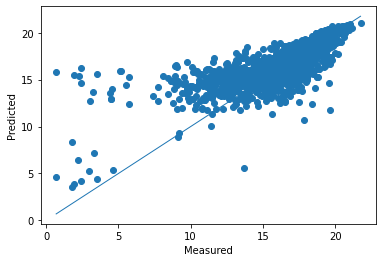

RMSLE of tuned Ridge model on train is: 2.2952536821902854


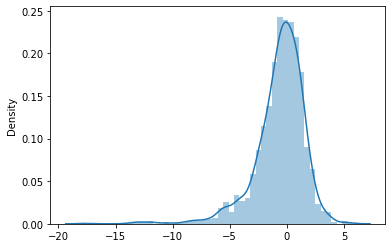

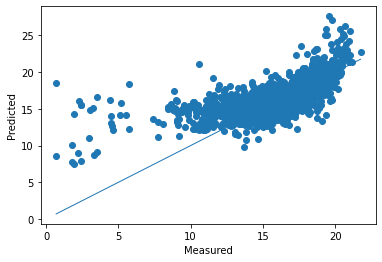

In [ ]:
for curr_model, curr_name in zip(all_models, models_names):
  predict_on_test_and_plot(curr_model, curr_name, test[wanted_cols])

We can see that all models have similar graphs. 

We can see in the scatter plot graphs that the suitability of the models' predictions is better for large reveneu values. We can also see that all models got similar mistakes for small revenue values, where the models predicted larger values then the true one. 

### 6.5. Ensemble models 

Using an ensemble of models is a known trick in Kaggle compatitions. Using an ensemble can increase the predictive power, and result in better performance. 

In each ensemble we will average the predicted values of each model in the ensemble and use the averaged value as the final prediction. 

We will try all combinations of models from the chosen five models (every size and combination of ensembles), sort the resulted RMSLE, look at the RMSLE over train and test, and pick the best ensemble of models. 


In [ ]:
for x_data, y_data, name_data in [[x_val_data, y_val_data, 'val'], [x_test_data, y_test_data, 'test']]: 

  models =  [model_1, tuned_et, model_3, tuned_rf, model_5]    #[model_1, model_2, model_3, model_4, model_5]   

  pred1 = np.exp(models[0].predict(x_data))
  pred2 = np.exp(models[1].predict(x_data))
  pred3 = np.exp(models[2].predict(x_data))
  pred4 = np.exp(models[3].predict(x_data))
  pred5 = np.exp(models[4].predict(x_data))


  s1 = [pred1, pred2, pred3, pred4, pred5]
  all_combinations = []
  for L in range(1, len(s1)+1):
      for subset in itertools.combinations(s1, L):
          all_combinations.append(subset)

  s2 = ["pred1", "pred2", "pred3", "pred4", "pred5"]
  names_combinations = []
  for L in range(1, len(s2)+1):
      for subset in itertools.combinations(s2, L):
          names_combinations.append(subset)

  all_results = []
  for comb, name in zip(all_combinations, names_combinations): 
    preds = np.mean( np.array(list(comb)), axis=0 )
    rmsle_test = math.sqrt(mean_squared_log_error(preds, np.exp(y_data))) 
    all_results.append((rmsle_test, name))

  all_results.sort()[:5]
  print(all_results)

Results of best combination that gave the lowest RMSLE, sorted by RMSLE. 

Train: 
* (2.170649125215332, ('pred1', 'pred4'))
* (2.1793372684230943, ('pred1', 'pred2', 'pred4'))
* (2.1823024519681002, ('pred4',))
* (2.185513703637945, ('pred1', 'pred3', 'pred4'))
* (2.186265361398547, ('pred1', 'pred2'))
* (2.1894203701606174, ('pred1', 'pred2', 'pred3', 'pred4'))
* **(2.189521734314066, ('pred2', 'pred4'))**

Test: 
* (1.9135224485277438, ('pred2',))
* **(1.9238783891903546, ('pred2', 'pred4'))**
* (1.9334048960837094, ('pred1', 'pred2', 'pred4'))
* (1.937956274630208, ('pred1', 'pred2'))
* (1.9534906044220004, ('pred2', 'pred3', 'pred4'))
* (1.9587161509529374, ('pred1', 'pred2', 'pred3', 'pred4'))
* (1.9595459216903448, ('pred2', 'pred3'))

From the results we decided to choose tuned ExtraTreesRegressor and RandomForestRegressor as an ensemble. 

The ensemble of the both provides the best test RMSLE for ensemble of more than one model, and we think it is more stable to use ensemble instead of single predictor. 

We can see that this ensemble provides higher RMSLE for train data than other ensembles, but we are interested in optimizing test data, and we think that models that are better on train than test might be overfitted. 

# 7. Save the final models 


We need to save both models- ExtraTreesRegressor and RandomForestRegressor 

We also need to save the selected columns in order to make sure to have the same columns in test data as in train data 

In [ ]:
filename = 'f_selected_features.sav'
pickle.dump([selected_cols], open(filename, 'wb'), -1)

filename = 'f_tuned_et_best.sav'
pickle.dump(tuned_et, open(filename, 'wb'), -1) 

filename = 'f_tuned_rf_best.sav'
pickle.dump(tuned_rf, open(filename, 'wb'), -1) 

print('done! ')

done! 


Sanity check- we want to make sure that the saves models gives same RMSLE results on train and test 

In [ ]:
all_x = pd.concat([x_train_data, x_val_data])
all_y = pd.concat([y_train_data, y_val_data])

In [ ]:
f_et = pickle.load(open('f_tuned_et_best.sav', 'rb'))
f_rf = pickle.load(open('f_tuned_rf_best.sav', 'rb'))

for x_d, y_d, name in zip([x_train_data, x_val_data, all_x, x_test_data], [y_train_data, y_val_data, all_y, y_test_data], ['train', 'val', 'all train', 'test']): 

  pred_et = np.exp(f_et.predict(x_d))
  pred_rf = np.exp(f_rf.predict(x_d))

  new_preds = np.mean( np.array([pred_et, pred_rf]), axis=0 )
  rmsle = math.sqrt(mean_squared_log_error(new_preds, np.exp(y_d)))
  print(f'RMSLE for {name} is {rmsle}')

RMSLE for train is 0.7263099499065638
RMSLE for val is 2.189521734314066
RMSLE for all train is 1.1750838266580623
RMSLE for test is 1.9238783891903546
